In [1]:
import pandas as pd
import datetime 

In [75]:
data = pd.read_csv('/home/godson/Documents/CoronaVirusAnalysis/my_tweets.csv')

In [76]:
data.shape

(195, 13)

In [77]:
data.head()

,Unnamed: 0,content,source,User,User_description,User_statuses_count,user_followers,User_location,User_verified,rt_count,fav_count,tweet_date,tweet_coordinates
0,0,I've put £1million in a fund to provide grants...,TweetDeck,Martin Lewis,"Founder @moneysavingexp, @mmhpi &(ish) @itvmls...",70705,698378,"MSE Towers, London",True,19343,41779.0,2020-03-19 14:41:45,NaN
1,1,This secret recording of @SenatorBurr suggests...,Twitter Web App,Alex Wagner,Co-host/EP @Sho_TheCircus + CBS News special c...,9933,228040,"New York, NY",True,23254,33008.0,2020-03-19 12:29:07,NaN
2,2,RT @carterforva: I'm old enough to remember wh...,Twitter for iPhone,lil fredo,wig guru • IG: luxwigsbyfredo Email• luxwigsby...,192938,4345,"Hyattsville, MD",False,29753,NaN,2020-03-19 19:58:58,NaN
3,3,RT @SocialistWitch: Coronavirus is not mother ...,Twitter for Android,★Bird-man★☆🏥🚑💉,If ur not making a move in ur life u wil b in ...,14003,2773,Belfast Mpumalanga,False,49595,NaN,2020-03-19 19:58:58,NaN
4,4,RT @BlackHammerOrg: CDC members admitted that ...,Twitter for iPhone,B U N N Y ♥️,"BLESSED 😇 Aliyah, Bunny, Dre ❤️💜",72328,1409,Jesus’ Cross,False,2815,NaN,2020-03-19 19:58:58,NaN


In [78]:
data.describe()

,Unnamed: 0,User_statuses_count,user_followers,rt_count,fav_count,tweet_coordinates
count,195.000000,195.000000,195.000000,195.000000,2.000000,0.0
mean,97.000000,43186.092308,7083.317949,28270.558974,37393.500000,NaN
std,56.435804,72846.285303,52891.921091,55905.731166,6202.033578,NaN
min,0.000000,21.000000,5.000000,113.000000,33008.000000,NaN
25%,48.500000,4332.500000,138.000000,549.000000,35200.750000,NaN
50%,97.000000,15997.000000,384.000000,3948.000000,37393.500000,NaN
75%,145.500000,46854.500000,1387.500000,26530.500000,39586.250000,NaN
max,194.000000,540677.000000,698378.000000,270917.000000,41779.000000,NaN


In [79]:
data['tweet_date'] = pd.to_datetime(data['tweet_date'])

In [80]:
data['tweet_date'].head()

0   2020-03-19 14:41:45
1   2020-03-19 12:29:07
2   2020-03-19 19:58:58
3   2020-03-19 19:58:58
4   2020-03-19 19:58:58
Name: tweet_date, dtype: datetime64[ns]

In [81]:
print("The furthest date is ",data['tweet_date'].min()," and the most recent is ",data['tweet_date'].max())

The furthest date is  2020-03-19 12:29:03  and the most recent is  2020-03-19 19:58:58


In [54]:
#We clearly do not have enough coordinates to plot a map
len(data.tweet_coordinates.unique())

11

In [74]:
i = 0
for index, cur in data.iterrows() :
    if str(cur['User_location']) != 'nan':
        i= i+1
print(i)

20323


In [73]:
data['User_location'][0]

nan

### Word Clouds

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [11]:
data.User_location.head(20)

0                       Sandy, UT
1                          Narnia
2                             NaN
3              Lincoln/Nottingham
4                 Washington, USA
5                 Los Angeles, CA
6                        Colorado
7     Red state hell-VOTE-She/her
8                     Lynwood, CA
9                , Ontario Canada
10                  Nashville, TN
11                       Malaysia
12                        DC & NC
13            Manila, Philippines
14                      Tennessee
15                    Houston, TX
16                 South Bend, IN
17                  Nashville, TN
18                       Lynn, MA
19                            NaN
Name: User_location, dtype: object

In [12]:
text = " ".join(content for content in data.content)
print ("There are {} words in the combination of all tweets content".format(len(text)))

There are 999269 words in the combination of all tweets content


In [13]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "COVID", "covid one"])

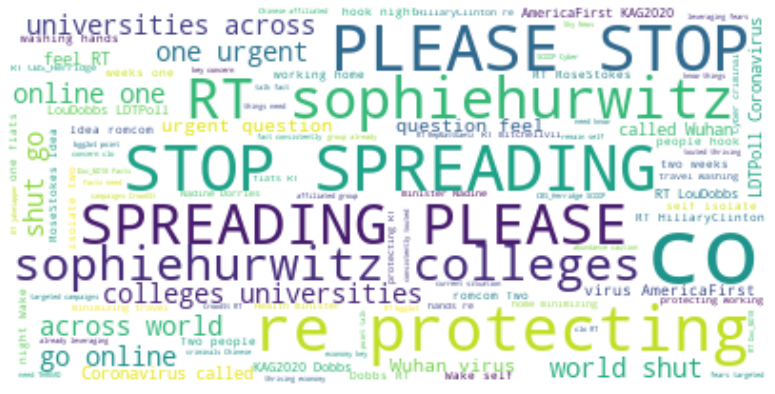

In [14]:
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[15,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Evolution over time

In [15]:
#Evolution of the number of tweets over the time
data['tweet_time'] = data.tweet_date.dt.strftime("%H:%M")#The formatting will change based on whether we want observe evolution 
# over minutes, hours or days
result = data.groupby(['tweet_time'], as_index= False).agg({"User":"count"})

In [16]:
result.head()

,tweet_time,User
0,23:47,414
1,23:48,648
2,23:49,613
3,23:50,602
4,23:51,580


In [17]:
result = result.rename(columns={'User':'number_of_tweets'})

/home/godson/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


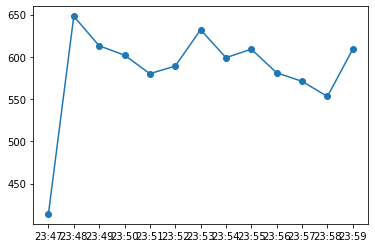

In [18]:
X = result.tweet_time
Y = result.number_of_tweets
plt.plot_date(X,Y, linestyle ='solid')
plt.show()
#plt.gcf().autofmt_xdate()

### Tweet Map

In [19]:
import pycountry

In [22]:
locations = data.User_location
i= 0

for text in locations:
    text = str(text)
    for country in pycountry.countries:
        if country.name in text:
            print(country)
            i = i+1

Country(alpha_2='CA', alpha_3='CAN', name='Canada', numeric='124')
Country(alpha_2='MY', alpha_3='MYS', name='Malaysia', numeric='458')
Country(alpha_2='PH', alpha_3='PHL', name='Philippines', numeric='608', official_name='Republic of the Philippines')
Country(alpha_2='US', alpha_3='USA', name='United States', numeric='840', official_name='United States of America')
Country(alpha_2='PH', alpha_3='PHL', name='Philippines', numeric='608', official_name='Republic of the Philippines')
Country(alpha_2='GE', alpha_3='GEO', name='Georgia', numeric='268')
Country(alpha_2='US', alpha_3='USA', name='United States', numeric='840', official_name='United States of America')
Country(alpha_2='PH', alpha_3='PHL', name='Philippines', numeric='608', official_name='Republic of the Philippines')
Country(alpha_2='IE', alpha_3='IRL', name='Ireland', numeric='372')
Country(alpha_2='IE', alpha_3='IRL', name='Ireland', numeric='372')
Country(alpha_2='MC', alpha_3='MCO', name='Monaco', numeric='492', official_n

Country(alpha_2='GB', alpha_3='GBR', name='United Kingdom', numeric='826', official_name='United Kingdom of Great Britain and Northern Ireland')
Country(alpha_2='US', alpha_3='USA', name='United States', numeric='840', official_name='United States of America')
Country(alpha_2='GH', alpha_3='GHA', name='Ghana', numeric='288', official_name='Republic of Ghana')
Country(alpha_2='JE', alpha_3='JEY', name='Jersey', numeric='832')
Country(alpha_2='PR', alpha_3='PRI', name='Puerto Rico', numeric='630')
Country(alpha_2='US', alpha_3='USA', name='United States', numeric='840', official_name='United States of America')
Country(alpha_2='IN', alpha_3='IND', name='India', numeric='356', official_name='Republic of India')
Country(alpha_2='CA', alpha_3='CAN', name='Canada', numeric='124')
Country(alpha_2='CA', alpha_3='CAN', name='Canada', numeric='124')
Country(alpha_2='CL', alpha_3='CHL', name='Chile', numeric='152', official_name='Republic of Chile')
Country(alpha_2='US', alpha_3='USA', name='Unit

Country(alpha_2='AU', alpha_3='AUS', name='Australia', numeric='036')
Country(alpha_2='AU', alpha_3='AUS', name='Australia', numeric='036')
Country(alpha_2='CA', alpha_3='CAN', name='Canada', numeric='124')
Country(alpha_2='MY', alpha_3='MYS', name='Malaysia', numeric='458')
Country(alpha_2='ID', alpha_3='IDN', name='Indonesia', numeric='360', official_name='Republic of Indonesia')
Country(alpha_2='JP', alpha_3='JPN', name='Japan', numeric='392')
Country(alpha_2='GB', alpha_3='GBR', name='United Kingdom', numeric='826', official_name='United Kingdom of Great Britain and Northern Ireland')
Country(alpha_2='IN', alpha_3='IND', name='India', numeric='356', official_name='Republic of India')
Country(alpha_2='PH', alpha_3='PHL', name='Philippines', numeric='608', official_name='Republic of the Philippines')
Country(alpha_2='US', alpha_3='USA', name='United States', numeric='840', official_name='United States of America')
Country(alpha_2='CA', alpha_3='CAN', name='Canada', numeric='124')
Cou

Country(alpha_2='GB', alpha_3='GBR', name='United Kingdom', numeric='826', official_name='United Kingdom of Great Britain and Northern Ireland')
Country(alpha_2='CA', alpha_3='CAN', name='Canada', numeric='124')
Country(alpha_2='IE', alpha_3='IRL', name='Ireland', numeric='372')
Country(alpha_2='CA', alpha_3='CAN', name='Canada', numeric='124')
Country(alpha_2='CA', alpha_3='CAN', name='Canada', numeric='124')
Country(alpha_2='PH', alpha_3='PHL', name='Philippines', numeric='608', official_name='Republic of the Philippines')
Country(alpha_2='US', alpha_3='USA', name='United States', numeric='840', official_name='United States of America')
Country(alpha_2='US', alpha_3='USA', name='United States', numeric='840', official_name='United States of America')
Country(alpha_2='AQ', alpha_3='ATA', name='Antarctica', numeric='010')
Country(alpha_2='NZ', alpha_3='NZL', name='New Zealand', numeric='554')
Country(alpha_2='GH', alpha_3='GHA', name='Ghana', numeric='288', official_name='Republic of G

Country(alpha_2='IE', alpha_3='IRL', name='Ireland', numeric='372')
Country(alpha_2='LU', alpha_3='LUX', name='Luxembourg', numeric='442', official_name='Grand Duchy of Luxembourg')


In [ ]:
print(i)